### Caged - visualização
Arquivo utilizado para a visualização dos dados do CAGED

In [1]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import var as var

In [2]:
dataFrameCAGED = pd.read_csv(f'./result/CAGED.csv')
divisor = 0
showLogs = False

def formatar_rotulos(valor, e):
    return '{:.0f}'.format(valor / divisor)

def makeDic(dados1, dados2, colSum, integer=False, showLogs=True):
    dic1 = {}
    dic2 = {}

    tot1 = 0

    if showLogs:
        print('>> Total:')
        
    for col in dados1['ano'].unique():
        totalAno = dados1[dados1['ano'] == col][colSum].sum()
        dic1[int(col)] = totalAno
        tot1 += totalAno

        if showLogs:
            print('{}: {}'.format(col, totalAno))

    if showLogs:
        print('>> Total: {}\n\n'.format(tot1))

    tot2 = 0
    if showLogs:
        print('>> Computação:')
    for col in dados2['ano'].unique():
        totalComputacao = dados2[dados2['ano'] == col][colSum].sum()
        dic2[int(col)] = totalComputacao
        tot2 += totalComputacao

        if showLogs:
            print('{}: {}'.format(col, totalComputacao))

    if showLogs:
        print('>> Total: {}\n\n'.format(tot2))

    pct = []
    for ano in dic1.keys():
        try:
            conta = round((dic2[int(ano)]*100) / dic1[int(ano)], 1)
        except:
            conta = round((dic2[ano]*100) / dic1[ano], 1)
        

        if integer:
            conta = int(conta)
            
        pct.append(str(conta) + '%')
        
        if showLogs:
            print('{}:\n>>> porcentagem de computação: {}%'.format(ano, conta))

    return dic1, dic2, pct

def salario(filter=False):
    global divisor
    label = ''

    divisor = 100000000
    
    if filter:
        label = '_c'
        dfSalario = pd.read_parquet(f'./result/CAGED_sal_c.parquet')
    else:
        dfSalario = pd.read_parquet(f'./result/CAGED_sal.parquet')

    if showLogs:
        display(dfSalario)

    dicSalarioTotal, dicSalarioComputacao, pct = makeDic(dfSalario, dfSalario[dfSalario['municipio'].astype(float).isin(dataFrameCAGED['CO_MUNICIPIO'].unique())], 'salario', showLogs=showLogs)

    fig = plt.figure(figsize=(8, 7))

    cores = ['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red']
    cores2 = ['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']

    # Configurando o gráfico de barras
    plt.bar(dicSalarioTotal.keys(), dicSalarioTotal.values(), color=cores, label='Total')
    plt.bar(dicSalarioComputacao.keys(), dicSalarioComputacao.values(), color=cores2, label='Computação')
    plt.xticks([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

    if filter:
        fig.suptitle('Salário das áreas econômicas de computação\nao longo dos anos, pelo conjunto total dos municípios\ne do conjunto de computação.', size=14)
    else:
        fig.suptitle('Salário de todas as áreas econômicas ao longo\ndos anos, pelo conjunto total dos municípios e\ndo conjunto de computação.', size=14)
    
    # Adicionando legendas e rótulos
    plt.xlabel('Ano')
    plt.ylabel('Salário (Bilhões)')
    
    plt.legend()

    annotateValues = [
        [2008.58, 2009],
        [2009.58, 2010],
        [2010.58, 2011],
        [2011.58, 2012],
        [2012.58, 2013],
        [2013.58, 2014],
        [2014.58, 2015],
        [2015.58, 2016],
        [2016.58, 2017],
        [2017.58, 2018],
        [2018.58, 2019],
        [2019.58, 2020],
    ]

    for i, value in enumerate(annotateValues):
        plt.annotate(pct[i], (value[0], dicSalarioComputacao[value[1]]/2), color='white', size=9.3)

    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formatar_rotulos))

    plt.savefig(f'./result/CAGED_SALARIO_COMPUTACAO{label}.png')
    plt.show()

def adimissoesDeligamentos(filter=False):
    global divisor
    label = ''


    if filter:
        label = '_c'
        dfAdmitidos = pd.read_parquet(f'./result/CAGED_admissao_c.parquet')
        dfDesligados = pd.read_parquet(f'./result/CAGED_desligamento_c.parquet')
        divisor = 1000
        text_size = 'mil'
    else:
        divisor = 1000000
        dfAdmitidos = pd.read_parquet(f'./result/CAGED_admissao.parquet')
        dfDesligados = pd.read_parquet(f'./result/CAGED_desligamento.parquet')
        text_size = 'milhões'

    if showLogs:
        display(dfAdmitidos)
        display(dfDesligados)

    dicAdmitidosTotal, dicAdmitidosComputacao, pctAdmitidos = makeDic(dfAdmitidos, dfAdmitidos[dfAdmitidos['municipio'].astype(float).isin(dataFrameCAGED['CO_MUNICIPIO'].unique())], 'admitidos', True, showLogs)
    dicDesligadosTotal, dicDesligadosComputacao, pctDesligados = makeDic(dfDesligados, dfDesligados[dfDesligados['municipio'].astype(float).isin(dataFrameCAGED['CO_MUNICIPIO'].unique())], 'desligados', True, showLogs)

    # Criar a figura e os eixos
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))

    cores = ['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red']
    cores2 = ['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']

    ax1.bar(dicAdmitidosTotal.keys(), dicAdmitidosTotal.values(), color=cores, label='Total')
    ax1.bar(dicAdmitidosComputacao.keys(), dicAdmitidosComputacao.values(), color=cores2, label='Computação')
    ax1.set_xticks([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
    ax1.set_ylabel(f'Admissões ({text_size})', size=14)
    ax1.set_title('(a) Admissões', size=14)
    ax1.legend()

    annotateValues = [
        [2008.58, 2009],
        [2009.58, 2010],
        [2010.58, 2011],
        [2011.58, 2012],
        [2012.58, 2013],
        [2013.58, 2014],
        [2014.58, 2015],
        [2015.58, 2016],
        [2016.58, 2017],
        [2017.58, 2018],
        [2018.58, 2019],
        [2019.58, 2020],
    ]

    for i, value in enumerate(annotateValues):
        ax1.annotate(pctAdmitidos[i], (value[0], dicAdmitidosComputacao[value[1]]/2), color='white', size=10)

    ax2.bar(dicDesligadosTotal.keys(), dicDesligadosTotal.values(), color=cores, label='Total')
    ax2.bar(dicDesligadosComputacao.keys(), dicDesligadosComputacao.values(), color=cores2, label='Computação')
    ax2.set_xticks([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
    ax2.set_ylabel('Desligamentos (milhões)', size=14)
    ax2.set_title('(b) Desligamentos', size=14)
    ax2.legend()

    for i, value in enumerate(annotateValues):
        ax2.annotate(pctDesligados[i], (value[0], dicAdmitidosComputacao[value[1]]/2), color='white', size=10)

    ax1.yaxis.set_major_formatter(ticker.FuncFormatter(formatar_rotulos))
    ax2.yaxis.set_major_formatter(ticker.FuncFormatter(formatar_rotulos))

    if filter:
        fig.suptitle('Admissões e desligamentos das áreas econômicas de computação\nao longo dos anos, pelo conjunto total dos municípios\ne do conjunto de computação.', size=14)
    else:
        fig.suptitle('Admissões e desligamentos de todas as áreas econômicas ao longo\ndos anos, pelo conjunto total dos municípios e\ndo conjunto de computação.', size=14)

    plt.tight_layout()
    plt.savefig(f'./result/CAGED_ADMISSOES_DESLIGAMENTOS{label}.png')
    plt.show()

def saldo(filter=False):
    global divisor
    label = ''
    

    if filter:
        label = '_c'
        dfSaldo = pd.read_parquet('./result/CAGED_saldo_c.parquet')
        divisor = 1000
    else:
        divisor = 10000
        dfSaldo = pd.read_parquet('./result/CAGED_saldo.parquet')

    if showLogs:
        display(dfSaldo)


    dicSaldoTotal, dicSaldoComputacao, pctSaldo = makeDic(dfSaldo, dfSaldo[dfSaldo['municipio'].astype(float).isin(dataFrameCAGED['CO_MUNICIPIO'].unique())], 'saldo', True, showLogs=showLogs)

    fig = plt.figure(figsize=(8, 5))

    cores = ['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red']
    cores2 = ['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']

    # Posições das barras no eixo x
    posicoes = np.arange(len(dfSaldo['ano'].unique()))

    # Largura das barras
    largura = 0.45

    # Configurando o gráfico de barras
    plt.bar(posicoes, dicSaldoTotal.values(), largura, color=cores, label='Total')
    plt.bar(posicoes + largura, dicSaldoComputacao.values(), largura, color=cores2, label='Computação')
    plt.xticks(posicoes + 0.21, dfSaldo['ano'].unique())

    # Adicionando legendas e rótulos
    plt.xlabel('Ano')
    plt.ylabel('Saldo (mil)')

    if filter:
        plt.title('Saldo total das áreas econômicas de computação ao longo dos anos,\npelo conjunto total dos municípios e do conjunto de computação.')
    else:
        plt.title('Saldo total de todas as áreas econômicas ao longo dos anos,\npelo conjunto total dos municípios e do conjunto de computação.')

    plt.legend()

    # Aplicando o formatador de rótulos ao eixo y
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formatar_rotulos))

    plt.savefig(f'./result/CAGED_SALDO{label}.png')
    plt.show()


#### Comparação entre os anos, do salário de todas as áreas econômicas, nos municípios brasileiros (representados pela cor vermelha, e label: Total), e nos municípios que ofertam cursos de computação (representados pela cor azul, e label: Computação).

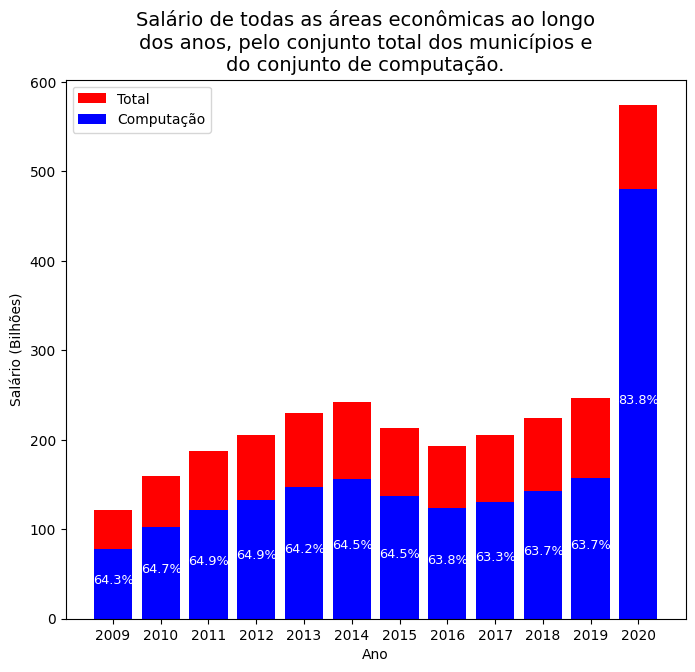

In [3]:
salario()

#### Comparação entre os anos, do salário das áreas econômicas de computação, nos municípios brasileiros (representados pela cor vermelha, e label: Total), e nos municípios que ofertam cursos de computação (representados pela cor azul, e label: Computação).

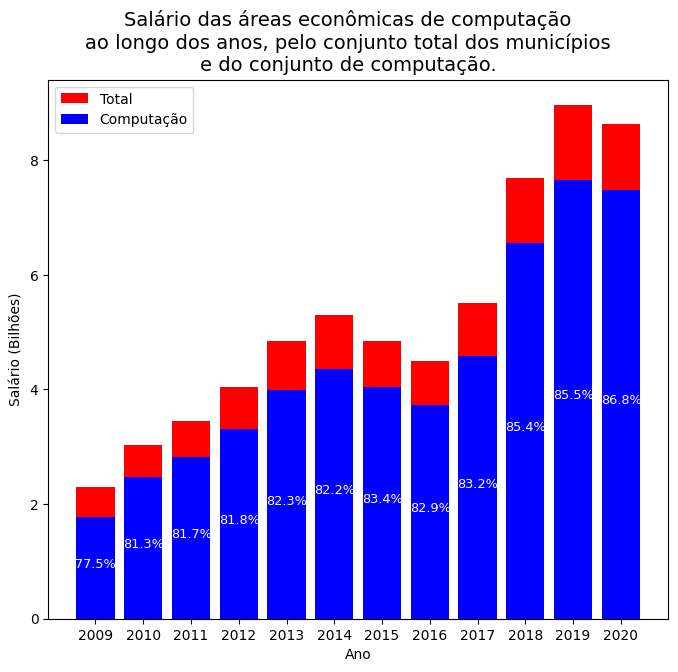

In [4]:
salario(True)

#### Comparação entre os anos, das admissões e desligamentos de todas as áreas econômicas, nos municípios brasileiros (representados pela cor vermelha, e label: Total), e nos municípios que ofertam cursos de computação (representados pela cor azul, e label: Computação).

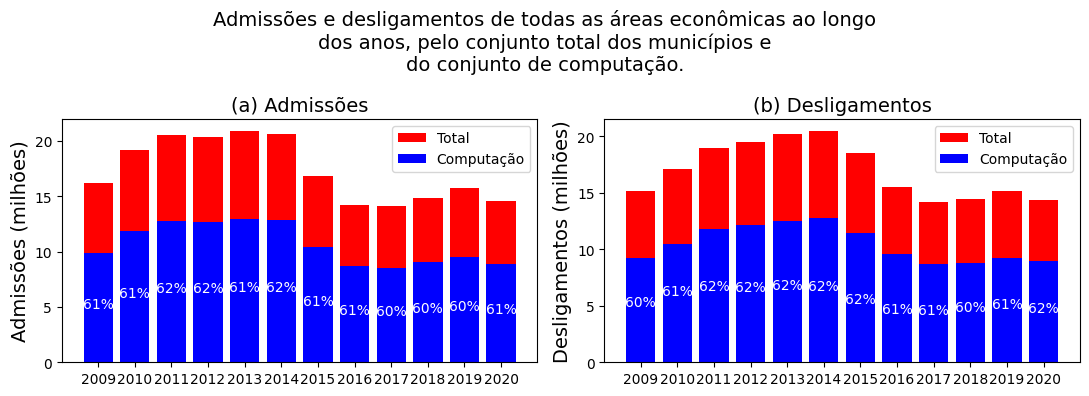

In [5]:
adimissoesDeligamentos()

#### Comparação entre os anos, das admissões e desligamentos das áreas econômicas de computação, nos municípios brasileiros (representados pela cor vermelha, e label: Total), e nos municípios que ofertam cursos de computação (representados pela cor azul, e label: Computação).

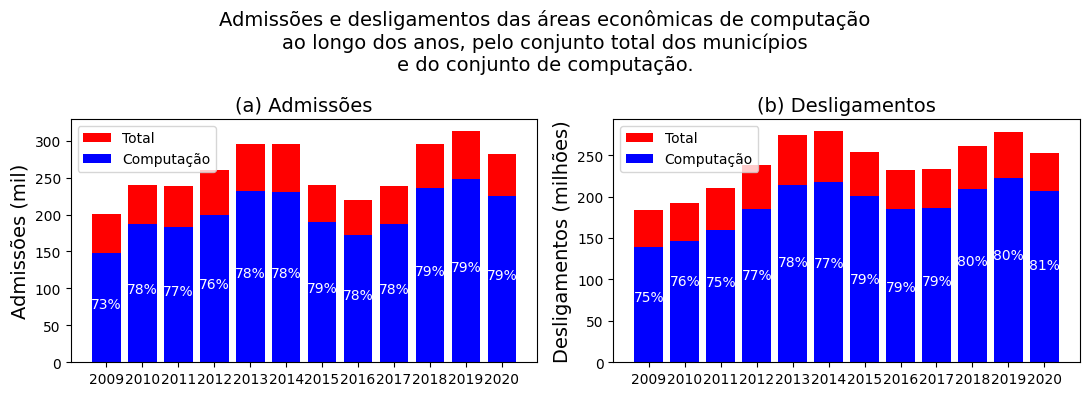

In [6]:
adimissoesDeligamentos(True)

#### Comparação entre os anos, do saldo (contratações subtraído desligamentos) de todas as áreas econômicas, nos municípios brasileiros (representados pela cor vermelha, e label: Total), e nos municípios que ofertam cursos de computação (representados pela cor azul, e label: Computação).

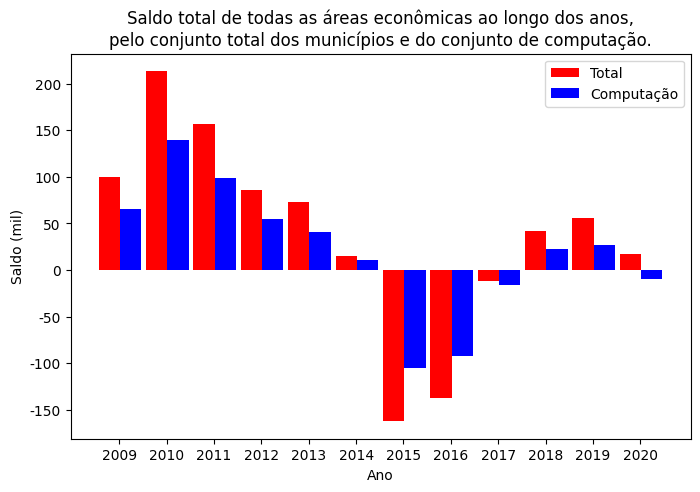

In [7]:
saldo()

#### Comparação entre os anos, do saldo (contratações subtraído desligamentos) das áreas econômicas de computação, nos municípios brasileiros (representados pela cor vermelha, e label: Total), e nos municípios que ofertam cursos de computação (representados pela cor azul, e label: Computação).

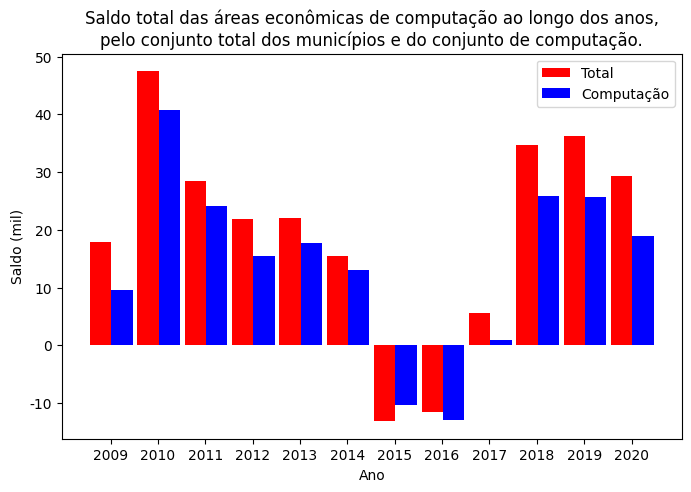

In [8]:
saldo(True)